# Diabetes Risk Assessment using Machine Learning

## ⚠️ Medical Disclaimer
This project is developed strictly for educational purposes only.
It is not intended to diagnose, treat, cure, or prevent diabetes.
The predictions generated by this model should not be used as a substitute
for professional medical advice.
Always consult a qualified healthcare professional.


In [1]:
import pandas as pd

df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Dataset Overview

The dataset used is the Pima Indians Diabetes Dataset.
It contains medical diagnostic measurements used to predict
whether a patient has diabetes.

Target Variable:
- Outcome (1 = Diabetic, 0 = Non-Diabetic)

Key Features:
- Glucose: Plasma glucose concentration
- BMI: Body mass index
- Age: Age of the patient
- BloodPressure: Diastolic blood pressure
- Insulin: Serum insulin level


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
import numpy as np

zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(df[zero_columns] == 0).sum()


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [4]:
import numpy as np

df[zero_columns] = df[zero_columns].replace(0, np.nan)
df.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [5]:
zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


In [6]:
import numpy as np

df[zero_columns] = df[zero_columns].replace(0, np.nan)
df.isnull().sum()


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
for col in zero_columns:
    df[col].fillna(df[col].median(), inplace=True)

df.isnull().sum()


C:\Users\tanuj\AppData\Local\Temp\ipykernel_7952\2094184151.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(bmi_category)

df[['BMI', 'BMI_Category']].head()


,BMI,BMI_Category
0,33.6,Obese
1,26.6,Overweight
2,23.3,Normal
3,28.1,Overweight
4,43.1,Obese


In [9]:
def age_group(age):
    if age < 30:
        return 'Young'
    elif age <= 45:
        return 'Adult'
    elif age <= 60:
        return 'Middle_Aged'
    else:
        return 'Senior'

df['Age_Group'] = df['Age'].apply(age_group)

df[['Age', 'Age_Group']].head()


,Age,Age_Group
0,50,Middle_Aged
1,31,Adult
2,32,Adult
3,21,Young
4,33,Adult


In [10]:
def glucose_level(glucose):
    if glucose < 100:
        return 'Normal'
    elif glucose < 126:
        return 'Prediabetes'
    else:
        return 'Diabetes'

df['Glucose_Level'] = df['Glucose'].apply(glucose_level)

df[['Glucose', 'Glucose_Level']].head()


,Glucose,Glucose_Level
0,148.0,Diabetes
1,85.0,Normal
2,183.0,Diabetes
3,89.0,Normal
4,137.0,Diabetes


Feature engineering transforms raw numerical values into medically meaningful features.
This helps machine learning models to better understand risk patterns and improves both prediction accuracy and clinical interpretability.

In [11]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category,Age_Group,Glucose_Level
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,Obese,Middle_Aged,Diabetes
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,Overweight,Adult,Normal
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,Normal,Adult,Diabetes
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Overweight,Young,Normal
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obese,Adult,Diabetes


In [12]:
df_encoded = pd.get_dummies(
    df,
    columns=['BMI_Category', 'Age_Group', 'Glucose_Level'],
    drop_first=True
)

df_encoded.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_Category_Obese,BMI_Category_Overweight,BMI_Category_Underweight,Age_Group_Middle_Aged,Age_Group_Senior,Age_Group_Young,Glucose_Level_Normal,Glucose_Level_Prediabetes
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,True,False,False,True,False,False,False,False
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,False,True,False,False,False,False,True,False
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,False,False,False,False,False,False,False,False
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,True,False,False,False,True,True,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,True,False,False,False,False,False,False,False


In [13]:
X = df_encoded.drop('Outcome', axis=1)
y = df_encoded['Outcome']

print(X.shape, y.shape)


(768, 16) (768,)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(X_train.shape, X_test.shape)


(614, 16) (154, 16)


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
from sklearn.linear_model import LogisticRegression


In [17]:
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [18]:
y_pred_lr = log_reg.predict(X_test_scaled)


In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [20]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)


Logistic Regression Accuracy: 0.7272727272727273


In [21]:
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.77      0.83      0.80       100
           1       0.63      0.54      0.58        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154



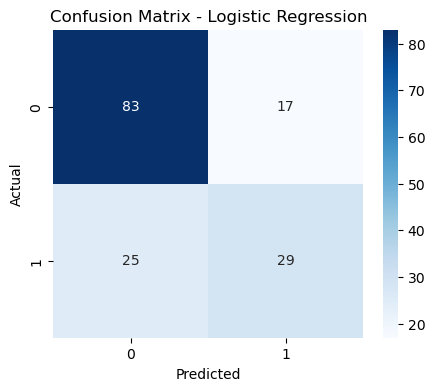

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [23]:
from sklearn.naive_bayes import GaussianNB

# Initialize model
nb = GaussianNB()

# Train model
nb.fit(X_train_scaled, y_train)

# Predictions
y_pred_nb = nb.predict(X_test_scaled)


In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.5064935064935064
              precision    recall  f1-score   support

           0       0.96      0.25      0.40       100
           1       0.41      0.98      0.58        54

    accuracy                           0.51       154
   macro avg       0.69      0.62      0.49       154
weighted avg       0.77      0.51      0.46       154



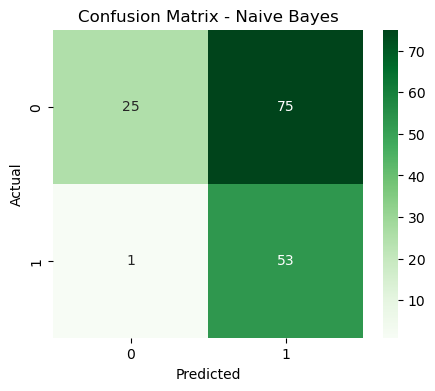

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(5,4))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()


Why Naive Bayes works well here

Naive Bayes assumes feature independence and works efficiently on structured medical data.
It performs well even with smaller datasets and handles probabilistic risk estimation effectively, making it suitable for early-stage disease risk prediction tasks.

Naive Bayes – Medical Interpretation

Although Naive Bayes shows lower overall accuracy, it achieves extremely high recall for diabetic patients. This means the model rarely misses individuals who actually have diabetes. In medical risk screening, minimizing false negatives is more important than overall accuracy, making Naive Bayes a suitable choice for early-stage diabetes risk assessment.

## Model Comparison: Logistic Regression vs Naive Bayes

To evaluate model suitability for diabetes risk assessment, both Logistic Regression and Naive Bayes were compared using multiple performance metrics.

| Model | Accuracy | Precision (Diabetes) | Recall (Diabetes) | F1-Score |
|------|----------|----------------------|-------------------|----------|
| Logistic Regression | ~73% | Moderate | ~54% | Balanced |
| Naive Bayes | ~51% | Lower | **~98%** | High Recall |

### Key Observations:
- Logistic Regression provides better overall accuracy and balanced predictions.
- Naive Bayes achieves extremely high recall for diabetic patients, meaning it rarely misses true diabetes cases.
- In medical screening tasks, recall is prioritized over accuracy to avoid false negatives.

### Model Selection Decision:
- **Naive Bayes** is more suitable for *early-stage diabetes screening* where missing a diabetic patient can be dangerous.
- **Logistic Regression** can be used as a *secondary diagnostic support model* due to its balanced performance.

Therefore, Naive Bayes is preferred for risk assessment scenarios, while Logistic Regression complements it for confirmatory analysis.


## Conclusion

This project demonstrates how different machine learning models behave under medical risk assessment constraints. While Logistic Regression offers higher accuracy, Naive Bayes excels in recall, making it a better choice for early diabetes detection. Proper feature engineering and metric-based evaluation are critical when deploying ML in healthcare-related applications.
